## Observations and Insights 

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata = mouse_metadata.dropna()
study_results = study_results.dropna()
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df = pd.DataFrame(merge_df.duplicated(["Mouse ID","Timepoint"]))
# to compare
booleanDictionary = {True: 'TRUE', False: 'FALSE'}
df = df.replace(booleanDictionary)
df = df.loc[df[0] == "TRUE", :]
df.index.values

array([909, 911, 913, 915, 917], dtype=int64)

In [4]:
dupt_mice = merge_df.iloc[[909, 911, 913, 915, 917],[0]]
dupt_mice

,Mouse ID
909,g989
911,g989
913,g989
915,g989
917,g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df["Mouse ID"] == "g989", :]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merge_df.drop(merge_df[merge_df["Mouse ID"]=="g989"].index)
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean["Mouse ID"].unique())

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped_df = clean.groupby(['Drug Regimen'])
mean = grouped_df["Tumor Volume (mm3)"].mean()
med = grouped_df["Tumor Volume (mm3)"].median()
var = grouped_df["Tumor Volume (mm3)"].var()
std = grouped_df["Tumor Volume (mm3)"].std()
sem = grouped_df["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
sum1 = pd.DataFrame({"mean":mean,
                    "med":med,
                    "var":var,
                    "std":std,
                    "sem":sem,
                    })
sum1

,mean,med,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df_agg = clean.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

AxesSubplot(0.125,0.125;0.775x0.755)


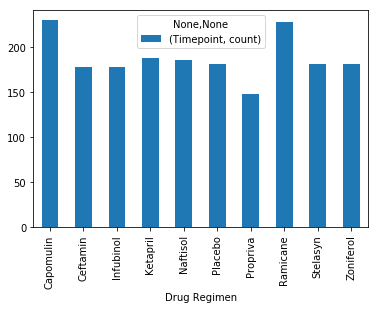

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
num_tp = clean.groupby(["Drug Regimen"]).agg({"Timepoint":["count"]})
num_tp['Drug Regimen'] = num_tp.index
myplot = num_tp.plot(kind='bar')
print(myplot)

TypeError: only size-1 arrays can be converted to Python scalars

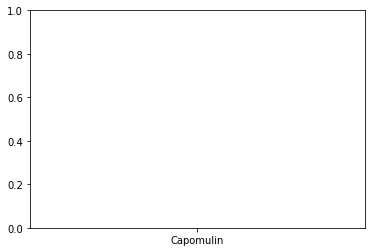

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(num_tp['Drug Regimen'], num_tp['Timepoint'])
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


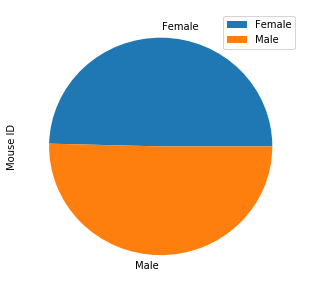

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean.groupby(['Sex']).nunique("Mouse ID")
myplot_pie = gender.plot.pie(y='Mouse ID', figsize=(5, 5))
print(myplot_pie)

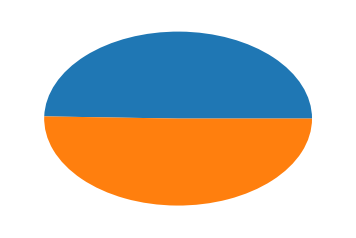

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender['Mouse ID'])
plt.show()


## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment = merge_df.loc[(merge_df["Drug Regimen"] == "Capomulin")|(merge_df["Drug Regimen"] == "Ramicane")|(merge_df["Drug Regimen"] == "Infubinol")|(merge_df["Drug Regimen"] == "Ceftamin"),:]

# Keep the last timepoint of each Mouse ID
treatment = treatment.drop_duplicates("Mouse ID", keep = "last")
treatment


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1


In [87]:
treatment.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

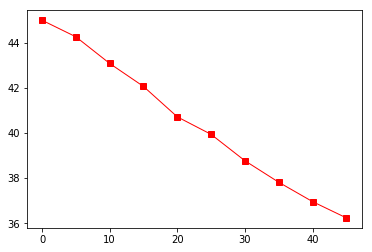

In [96]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = merge_df.loc[(merge_df["Drug Regimen"] == "Capomulin"),:]
g_c = capomulin.groupby("Timepoint").agg({"Tumor Volume (mm3)":["mean"]})
g_c['Timepoint'] = g_c.index
x_axis = np.array(g_c["Timepoint"])
y = np.array(g_c["Tumor Volume (mm3)"])
capomulin_p = plt.plot(x_axis, y, marker="s", color="Red", linewidth=1, label="Capomulin")


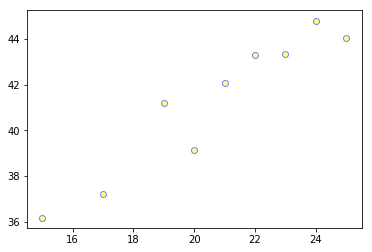

In [110]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
g_c_w = capomulin.groupby("Weight (g)").agg({"Tumor Volume (mm3)":["mean"]})
g_c_w['Weight (g)'] = g_c_w.index
x = np.array(g_c_w["Weight (g)"])
y = np.array(g_c_w["Tumor Volume (mm3)"])
plt.scatter(x, y, marker="o", facecolors="yellow", edgecolors="blue", alpha=0.5)
plt.show()

## Correlation and Regression

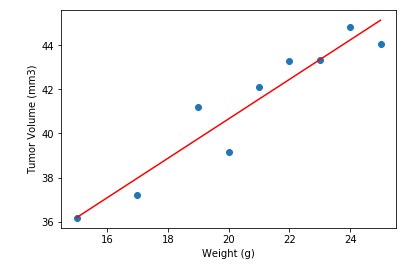

In [122]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

y_values = g_c_w["Tumor Volume (mm3)"]
y_values['Weight (g)'] = y_values.index
x_values = y_values["Weight (g)"]
y_values = y_values["mean"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()